In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# creating a neural network in PyTorch
class BasicNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.w00 = nn.Parameter(torch.tensor(1.7),requires_grad = False) # requires_grad means whether requires backpropagation for optimisation
    self.b00 = nn.Parameter(torch.tensor(-0.85),requires_grad = False) # nn.Parameter makes them part of a neural network
    self.w01 = nn.Parameter(torch.tensor(-40.8),requires_grad = False)
    self.w10 = nn.Parameter(torch.tensor(12.6),requires_grad = False)
    self.b10 = nn.Parameter(torch.tensor(0.0),requires_grad = False)
    self.w11 = nn.Parameter(torch.tensor(2.7),requires_grad = False)
    self.final_bias = nn.Parameter(torch.tensor(-16.0),requires_grad = False)

  def forward(self,input):
    input_to_top_relu = input*self.w00 + self.b00
    top_relu_output = F.relu(input_to_top_relu)
    scaled_top_relu_output = top_relu_output*self.w01
    input_to_bottom_relu = input*self.w10 + self.b10
    bottom_relu_output = F.relu(input_to_bottom_relu)
    scaled_bottom_relu_output = bottom_relu_output*self.w11
    input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias
    output = F.relu(input_to_final_relu)
    return output


<Axes: xlabel='None', ylabel='None'>

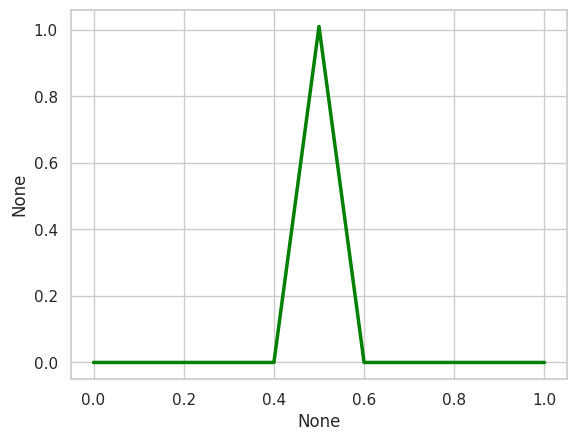

In [5]:
input_doses = torch.linspace(0.,1.,11)
model = BasicNN()
output_doses = model(input_doses)
sns.set(style='whitegrid')
sns.lineplot(x=input_doses,y=output_doses,color='green',linewidth=2.5)

Final bias before optimization : tensor(0.)

Step : 0 Loss : 256.3200988769531

Step : 1 Loss : 164.0448760986328

Step : 2 Loss : 104.98870849609375

Step : 3 Loss : 67.1927719116211

Step : 4 Loss : 43.00336837768555

Step : 5 Loss : 27.522159576416016

Step : 6 Loss : 17.614181518554688

Step : 7 Loss : 11.273076057434082

Step : 8 Loss : 7.21476936340332

Step : 9 Loss : 4.6174516677856445

Step : 10 Loss : 2.9551703929901123

Step : 11 Loss : 1.8913096189498901

Step : 12 Loss : 1.210437297821045

Step : 13 Loss : 0.7746805548667908

Step : 14 Loss : 0.49579527974128723

Step : 15 Loss : 0.3173092007637024

Step : 16 Loss : 0.20307788252830505

Step : 17 Loss : 0.12997011840343475

Step : 18 Loss : 0.0831809863448143

Step : 19 Loss : 0.053235918283462524

Step : 20 Loss : 0.03407112881541252

Step : 21 Loss : 0.021805522963404655

Step : 22 Loss : 0.013955534435808659

Step : 23 Loss : 0.008931614458560944

Step : 24 Loss : 0.005716175306588411

Step : 25 Loss : 0.003658306086435

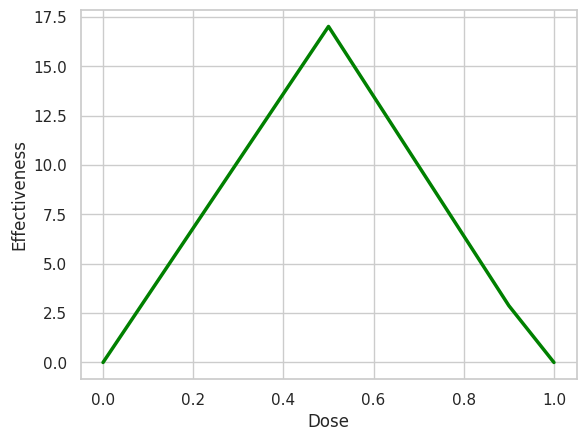

In [7]:
class BasicNN_train(nn.Module):
  def __init__(self):
    super().__init__()
    self.w00 = nn.Parameter(torch.tensor(1.7),requires_grad = False) # requires_grad means whether requires backpropagation for optimisation
    self.b00 = nn.Parameter(torch.tensor(-0.85),requires_grad = False) # nn.Parameter makes them part of a neural network
    self.w01 = nn.Parameter(torch.tensor(-40.8),requires_grad = False)
    self.w10 = nn.Parameter(torch.tensor(12.6),requires_grad = False)
    self.b10 = nn.Parameter(torch.tensor(0.0),requires_grad = False)
    self.w11 = nn.Parameter(torch.tensor(2.7),requires_grad = False)
    self.final_bias = nn.Parameter(torch.tensor(0.0),requires_grad = True)

  def forward(self,input):
    input_to_top_relu = input*self.w00 + self.b00
    top_relu_output = F.relu(input_to_top_relu)
    scaled_top_relu_output = top_relu_output*self.w01
    input_to_bottom_relu = input*self.w10 + self.b10
    bottom_relu_output = F.relu(input_to_bottom_relu)
    scaled_bottom_relu_output = bottom_relu_output*self.w11
    input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias
    output = F.relu(input_to_final_relu)
    return output

model = BasicNN_train()
output_doses = model(input_doses)
input = torch.tensor([0.,0.5,1.])
label = torch.tensor([0.,1.,0.])
optimizer = SGD(model.parameters(),lr=0.1)
print("Final bias before optimization : " + str(model.final_bias.data) + "\n")
for epoch in range(100):
  total_loss = 0
  for iteration in range(len(input)):
    input_i = input[iteration]
    label_i = label[iteration]
    output_i = model(input_i)
    loss = (output_i - label_i)**2
    loss.backward() # computes gradients of loss function wrt final bias for back propagation and stores it in model and sums it with previous gradients in the same epoch
    total_loss += float(loss)
  if (total_loss < 0.0001):
    print("Num Steps : " + str(epoch))
    break
  optimizer.step() # Applies gradients to final bias after summing all gradients in the current epoch
  optimizer.zero_grad() # Makes all gradients stored in the model to zero for next epoch
  print("Step : " + str(epoch) + " Loss : " + str(total_loss) + "\n")
print("Final bias after optimization : " + str(model.final_bias.data) + "\n")
sns.set(style='whitegrid')
sns.lineplot(x=input_doses,y=output_doses.detach(),color='green',linewidth=2.5) # detach removes all the gradients computed and creates only a tensor of values
plt.ylabel('Effectiveness')
plt.xlabel('Dose')
plt.show()
